# Kernal PCA

**Importing Libraries**

In [1]:
# Numpy allows us to work with array.
import numpy as np

# Maptplotlib which allows us to plot some chart.
import matplotlib.pyplot as plt

# Pandas allows us to not only import the datasets but also create the matrix of features(independent) and 
# dependent variable.
import pandas as pd

**Importing the dataset**

- The independent variable usally in the first columns of dataset and dependent variable usally in the last columns of the data sets.
- X is Independent Variable.
- Y is Dependent Variable.

In [2]:
dataset = pd.read_csv("Wine.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(x)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [3]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


**Splitting the dataset into the training set**

In [4]:
# Importing Package
from sklearn.model_selection import train_test_split

# Dividing training and test set.
# The best ratio is 80 - 20 for trainging and testing respectively.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train)

[[1.364e+01 3.100e+00 2.560e+00 ... 9.600e-01 3.360e+00 8.450e+02]
 [1.260e+01 2.460e+00 2.200e+00 ... 7.300e-01 1.580e+00 6.950e+02]
 [1.196e+01 1.090e+00 2.300e+00 ... 9.900e-01 3.130e+00 8.860e+02]
 ...
 [1.242e+01 1.610e+00 2.190e+00 ... 1.060e+00 2.960e+00 3.450e+02]
 [1.390e+01 1.680e+00 2.120e+00 ... 9.100e-01 3.330e+00 9.850e+02]
 [1.416e+01 2.510e+00 2.480e+00 ... 6.200e-01 1.710e+00 6.600e+02]]


In [5]:
print(y_train)

[1 3 2 3 1 3 3 1 3 1 2 3 3 2 3 3 1 2 3 2 2 3 2 1 2 2 2 1 1 2 2 3 3 2 2 2 3
 3 1 3 2 2 2 2 2 1 1 2 1 3 1 3 1 1 2 1 2 2 1 3 2 1 2 2 2 3 1 3 3 1 1 2 3 1
 1 2 2 1 1 1 3 2 1 2 3 1 2 3 3 1 1 3 1 3 2 1 1 2 1 3 2 3 1 3 3 3 1 2 2 2 2
 3 3 2 2 1 2 3 3 1 1 3 2 2 2 1 1 1 2 2 2 1 3]


**Feature Scaling**

In [6]:
# Importing Package
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fitting and Transforming
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Applying Kernel PCA**

In [7]:
# Importing Package
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'rbf')

x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

**Training the Logistic Regression model on the Training Set**

In [8]:
# Importing Package
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

# Fitting
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

**Making the Confusion Matrix**

In [9]:
# Importing Package
from sklearn.metrics import confusion_matrix, accuracy_score

# Predicting
y_pred = classifier.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy Score
print("Accuracy Score of PCA is",accuracy_score(y_test, y_pred))

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]
Accuracy Score of PCA is 1.0


**Visualising the Training Set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


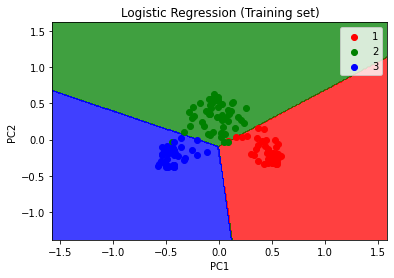

In [10]:
# Importing Package
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**Visualising the Test Set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


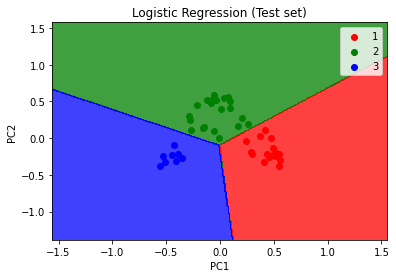

In [11]:
# Importing Package
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()